In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
saber = pd.read_csv("saber_combined_all_fields.csv")

### Download the translation_saber.txt file from the link below
https://drive.google.com/file/d/1g1QlvNIIC_avtLV_Kr1uaGEtKxrBwNBD/view?usp=sharing

In [3]:
# Credits to Mudit for this block of code
# Read the text file
with open('translation_saber.txt') as f:
    lines = f.readlines()

# Create a dictionary for the translations
translations = {}
for line in lines:
    key, value = line.split(",")
    key = key.strip("'")
    value = value.strip('\n')
    value = value[2:]
    translations[key] = value
    
# Renaming the columns using the translations dictionary
saber.rename(columns = translations, inplace = True)

In [4]:
saber.head()

,Unnamed: 0,Type of document,Nationality,Gender,Birth date,Are they foreigns?,Period,Consecutive Number,Civil state,Is student?,...,Saber 11 ICFES Biology,Saber 11 ICFES Chemistry,Saber 11 ICFES Physics,Saber 11 ICFES Social Sciences,Saber 11 ICFES Philosophy,Saber 11 ICFES English,Saber 11 ICFES English Score Category,Saber 11 ICFES Optative,Saber 11 ICFES Optative score,Optative score category
0,0,TI,COLOMBIA,M,30/07/1996,NaN,20134,EK201340233804,Soltero,ESTUDIANTE,...,39.0,42.0,33.0,33.0,29.0,38.0,A-,PUNT_INTERDISC_MEDIOAMBIENTE,49.0,NaN
1,1,CC,COLOMBIA,M,13/04/1994,NaN,20133,EK201330220754,Soltero,ESTUDIANTE,...,52.0,52.0,54.0,44.0,47.0,51.0,A1,PUNT_PROFUNDIZA_LENGUAJE,6.0,II
2,2,CC,COLOMBIA,F,08/12/1991,NaN,20134,EK201340246502,Soltero,ESTUDIANTE,...,50.0,51.0,28.0,46.0,45.0,43.0,A-,PUNT_PROFUNDIZA_BIOLOGIA,5.0,I
3,3,TI,COLOMBIA,F,10/01/1996,NaN,20134,EK201340237996,Soltero,ESTUDIANTE,...,34.0,35.0,45.0,42.0,40.0,43.0,A-,PUNT_INTERDISC_VIOLENCIAYSOC,29.0,NaN
4,4,CC,COLOMBIA,M,11/10/1995,NO,20173,EK201730119521,NaN,ESTUDIANTE,...,57.0,65.0,44.0,49.0,43.0,42.0,A-,PUNT_INTERDISC_MEDIOAMBIENTE,55.0,NaN


In [5]:
del saber['Unnamed: 0']

In [6]:
# Remove duplicated columns

saber = saber.loc[:, ~saber.columns.duplicated()]

In [14]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [8]:
saber.head()

,Type of document,Nationality,Gender,Birth date,Are they foreigns?,Period,Consecutive Number,Civil state,Is student?,Residing country,Etchnity,State,State code,Municipality,Municipality code,Did he finished college?,Year of exam,Semester of exam,Porcentage approval credits,Cost of college per semester,Cost of college by scholarship,It is being paid by credit?,Parents college paid amount,Student college paid amount,Did student took preparation test?,Took an special preparation test?,Took another test that's not lectured by government?,Did he take an external test?,Did you did a simulacrum?,Are you veteran? Air Forces,Generic preparation for test,Current semester,Family actual home,Are you in-charge of your family?,Number of people in charge,Father's education,Mother's,Father's Occupation,Mother's Jo bOccupation,Father's Job,other's Job,House stratum,Colombian Sisben level,Family has internet?,Do you have computer?,Do you have kiln?,Do you have car?,Do you have fridge?,Do you have cellphone?,How much books do you have,Does family have a phone?,Mensual family income,Current job,Code of institution you are current enrolled on,Name of institution you are current enrolled on,Academic program,Code of academic program,Reference group,Municipality program,State program,Academic program level,Program method,Undergraduate core,#Municipality code,Municipality of the institution,State of the institution,Type of institution,Origin of institution,Score math module - Saber Pro,Score language module - Saber Pro,Score social science module - Saber Pro,Score English Saber Pro,Score Writing Saber Pro,Research status,State institution code,Type of nationality,Genre,Semester,Consecutive code,Student,Current country,Current state,Code current state,Current municipality,Code current municipality,Type of area,Amount of pension,Number of times taking the exam,Father's education,other's education,ather's Occupation,Mother's occupation,Stratum,Sisben score,Number of people at home,Number of bedrooms,Number of floors,Do they have internet?,Do they have computer?,Do they have washer?,Do they have microwave?,Do they have kiln?,Do they have car?,Do they have DVD?,Do they have fridge?,Do they have cellphone?,Do they have phone?,Do you have job?,Do you have policy record?,Expectatives,Saber 11 ICFES code,Saber 11 ICFES,School type,School calendar,Bilingual school?,School character,Code DANE,Name of DANE,Principal headquarters,School area,School time,School code Municipality,Code School Municipality,Code School State,School State,Saber 11 ICFES Language,Saber 11 ICFES Mathematics,Saber 11 ICFES Biology,Saber 11 ICFES Chemistry,Saber 11 ICFES Physics,Saber 11 ICFES Social Sciences,Saber 11 ICFES Philosophy,Saber 11 ICFES English,Saber 11 ICFES English Score Category,Saber 11 ICFES Optative,Saber 11 ICFES Optative score,Optative score category
0,TI,COLOMBIA,M,30/07/1996,NaN,20134,EK201340233804,Soltero,ESTUDIANTE,COLOMBIA,NaN,BOYACA,15.0,GUATEQUE,15322.0,Bachiller técnico,2013.0,Primer semestre,No sigue el sistema de créditos,No pagó matrícula,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Es habitual o permanente,No,Ninguna,Educación profesional completa,Secundaria (Bachillerato) completa,Profesional independiente,Profesional independiente,NaN,NaN,Estrato 3,No está clasificada por el SISBEN,Si,No,Si,No,Si,Si,NaN,No,Entre 3 y menos de 5 SMLV,No,9110,SERVICIO NACIONAL DE APRENDIZAJE-SENA,TECNOLOGÍA EN CONTABILIDAD Y FINANZAS,91157.0,TECNOLOGICO EN ADMINISTRACIÓN Y TURISMO,BOGOTÁ D.C.,BOGOTA,TECNOLOGÍA,DISTANCIA,CONTADURIA PUBLICA,11001,BOGOTÁ D.C.,BOGOTA,INSTITUCIÓN TECNOLÓGICA,OFICIAL NACIONAL,9.6,8.3,8.2,9.4,9.4,PUBLICAR,11,COLOMBIA,M,20122,SB11201220401680,ESTUDIANTE,COLOMBIA,BOYACA,15.0,GUATEQUE,15322.0,Cabecera Municipal,No paga Pensión,NaN,Postgrado,Secundaria (Bachillerato) completa,Empresario,Empresario,Estrato 3,No está clasificada por el SISBEN,Cuatro,Cuatro,"Madera pulida, baldosa, tableta, mármol, alfombra",Si,Si,Si,Si,Si,Si,Si,Si,Si,Si,No,No,NaN,5207

In [9]:
saber.describe()

,Period,State code,Municipality code,Year of exam,Current semester,Code of institution you are current enrolled on,Code of academic program,#Municipality code,Score math module - Saber Pro,Score language module - Saber Pro,Score social science module - Saber Pro,Score English Saber Pro,Score Writing Saber Pro,State institution code,Semester,Code current state,Code current municipality,Saber 11 ICFES code,Saber 11 ICFES,Code DANE,School code Municipality,Code School State,Saber 11 ICFES Language,Saber 11 ICFES Mathematics,Saber 11 ICFES Biology,Saber 11 ICFES Chemistry,Saber 11 ICFES Physics,Saber 11 ICFES Social Sciences,Saber 11 ICFES Philosophy,Saber 11 ICFES English,Saber 11 ICFES Optative score
count,212010.000000,211645.000000,211645.000000,46960.000000,126187.00000,212010.000000,205479.000000,212010.000000,212010.000000,212010.000000,212010.000000,212010.000000,206081.000000,212010.000000,212010.000000,207003.000000,207003.000000,201007.000000,2.119420e+05,2.120060e+05,212010.000000,212010.000000,212010.000000,212010.000000,212010.000000,212010.000000,212010.000000,212010.000000,212010.000000,212010.000000,212010.000000
mean,20170.184156,37.972761,29130.862539,2011.922466,6.94940,3476.782727,37047.804530,23531.839177,124.132469,125.597165,118.642899,128.173597,122.054210,23.502028,20125.858903,31.055593,31219.959063,57303.614804,2.278883e+11,2.280815e+11,31352.437918,31.179492,51.457111,51.778789,49.445092,50.275350,48.835602,49.687142,45.089265,51.896175,29.798788
std,14.162938,947.511332,25780.276662,2.210888,2.68588,3810.251141,39054.944918,23418.009068,67.003673,67.785399,65.291892,69.784358,67.177796,23.398977,5.155925,26.256827,26286.061165,47104.013480,1.016193e+11,1.019350e+11,26240.501407,26.212527,7.551992,12.476416,8.194308,8.353876,10.001497,8.703722,9.299312,14.487412,23.229438
min,20123.000000,5.000000,5001.000000,1968.000000,1.00000,1101.000000,1.000000,5001.000000,0.000000,0.000000,0.000000,0.000000,6.600000,5.000000,20121.000000,5.000000,5001.000000,0.000000,3.110010e+10,0.000000e+00,5001.000000,5.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,20163.000000,11.000000,11001.000000,2012.000000,4.00000,1704.000000,2524.000000,11001.000000,100.000000,101.000000,88.000000,109.000000,98.000000,11.000000,20122.000000,11.000000,11001.000000,16691.000000,1.231820e+11,1.231715e+11,11001.000000,11.000000,46.000000,43.000000,44.000000,45.000000,43.000000,44.000000,39.000000,43.000000,5.000000
50%,20173.000000,13.000000,13001.000000,2012.000000,8.00000,1818.000000,13734.000000,11001.000000,145.000000,147.000000,138.000000,147.000000,141.000000,11.000000,20122.000000,17.000000,17013.000000,42218.000000,1.865680e+11,1.880010e+11,17873.000000,17.000000,52.000000,51.000000,49.000000,50.000000,48.000000,49.000000,45.000000,47.000000,40.000000
75%,20183.000000,52.000000,52001.000000,2012.000000,9.00000,2849.000000,90876.000000,25175.000000,172.000000,175.000000,168.000000,179.000000,168.000000,25.000000,20132.000000,54.000000,54001.000000,97444.000000,3.117690e+11,3.117690e+11,54001.000000,54.000000,56.000000,58.000000,54.000000,55.000000,55.000000,55.000000,51.000000,58.000000,52.000000
max,20184.000000,99999.000000,99999.000000,2015.000000,11.00000,129593.000000,106552.000000,99001.000000,300.000000,300.000000,300.000000,300.000000,300.000000,99.000000,20141.000000,99.000000,99773.000000,179358.000000,8.548740e+11,8.548740e+11,99773.000000,99.000000,109.000000,127.000000,100.000000,95.000000,124.000000,111.000000,103.000000,100.000000,90.000000


In [10]:
saber.shape

(212010, 137)

In [11]:
saber.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212010 entries, 0 to 212009
Data columns (total 137 columns):
 #    Column                                                Non-Null Count   Dtype  
---   ------                                                --------------   -----  
 0    Type of document                                      212010 non-null  object 
 1    Nationality                                           212010 non-null  object 
 2    Gender                                                212007 non-null  object 
 3    Birth date                                            211889 non-null  object 
 4    Are they foreigns?                                    164892 non-null  object 
 5    Period                                                212010 non-null  int64  
 6    Consecutive Number                                    212010 non-null  object 
 7    Civil state                                           146178 non-null  object 
 8    Is student?                     

In [12]:
saber.isnull().sum()

Type of document                              0
Nationality                                   0
Gender                                        3
Birth date                                  121
Are they foreigns?                        47118
                                          ...  
Saber 11 ICFES English                        0
Saber 11 ICFES English Score Category        22
Saber 11 ICFES Optative                       0
Saber 11 ICFES Optative score                 0
Optative score category                  114055
Length: 137, dtype: int64

## Finding NAN Percentage per Column

In [15]:
percent_nan = saber.isnull().sum() * 100 / len(saber)
saber_nan_values = pd.DataFrame({'column_name':saber.columns, 
                                 'percent_nan':percent_nan})

saber_nan_values.sort_values('percent_nan', ascending=False, inplace=True)
saber_nan_values[['percent_nan']]

,percent_nan
Porcentage approval credits,78.764209
Did student took preparation test?,78.429319
Current job,78.099618
Colombian Sisben level,77.920381
Mensual family income,77.920381
Do you have kiln?,77.920381
Does family have a phone?,77.920381
Year of exam,77.850101
Semester of exam,77.801047
Do you have cellphone?,77.799160


In [16]:
# Credits to Ayoub for the cat and num feature division

# Categorical features
cat_col=saber.select_dtypes(include='object').columns.to_list()
cat_col, len(cat_col)

# Numerical features
num_col=saber.select_dtypes(include='number').columns.to_list()
num_col

['Period',
 'State code',
 'Municipality code',
 'Year of exam',
 'Current semester',
 'Code of institution you are current enrolled on',
 'Code of academic program',
 '#Municipality code',
 'Score math module - Saber Pro',
 'Score language module - Saber Pro',
 'Score social science module - Saber Pro',
 'Score English Saber Pro',
 'Score Writing Saber Pro',
 'State institution code',
 'Semester',
 'Code current state',
 'Code current municipality',
 'Saber 11 ICFES code',
 'Saber 11 ICFES',
 'Code DANE',
 'School code Municipality',
 'Code School State',
 'Saber 11 ICFES Language',
 'Saber 11 ICFES Mathematics ',
 'Saber 11 ICFES Biology ',
 'Saber 11 ICFES Chemistry ',
 'Saber 11 ICFES Physics ',
 'Saber 11 ICFES Social Sciences ',
 'Saber 11 ICFES Philosophy ',
 'Saber 11 ICFES English',
 'Saber 11 ICFES Optative score']

In [17]:
saber_nan_cat_values = saber_nan_values.loc[cat_col].sort_values('percent_nan', ascending=False)
saber_nan_cat_values.reset_index(drop=True)

,column_name,percent_nan
0,Porcentage approval credits,78.764209
1,Did student took preparation test?,78.429319
2,Current job,78.099618
3,Mensual family income,77.920381
4,Does family have a phone?,77.920381
5,Do you have kiln?,77.920381
6,Colombian Sisben level,77.920381
7,Semester of exam,77.801047
8,Do you have fridge?,77.799160
9,Do you have cellphone?,77.799160


In [18]:
saber_nan_num_values = saber_nan_values.loc[num_col].sort_values('percent_nan', ascending=False)
saber_nan_num_values.reset_index(drop=True)

,column_name,percent_nan
0,Year of exam,77.850101
1,Current semester,40.480638
2,Saber 11 ICFES code,5.189850
3,Code of academic program,3.080515
4,Score Writing Saber Pro,2.796566
5,Code current state,2.361681
6,Code current municipality,2.361681
7,Municipality code,0.172162
8,State code,0.172162
9,Saber 11 ICFES,0.032074


In [20]:
cat_nan_columns = saber_nan_cat_values[saber_nan_cat_values['percent_nan'] > 20]['column_name'].to_list()
num_nan_columns = saber_nan_num_values[saber_nan_num_values['percent_nan'] > 20]['column_name'].to_list()

print("There are {} categorical columns with more than 20% nan values".format(len(cat_nan_columns)))
print("There are {} numerical columns with more than 20% nan values".format(len(num_nan_columns)))

There are 30 categorical columns with more than 20% nan values
There are 2 numerical columns with more than 20% nan values


#### Although there are 32 columns with more than 20% NaN values, I'll be performing some data visualizations to determine the relationships between columns and Saber pro. Some of these categorical columns, albeit having majority NaN values, can tell us something about the distribution of student population across Colombia. 

## Questions for Visualization

Looping here the questions I came up with for the initial visualization. Feel free to chime in, add, remove, and change some questions. Question list should be updated as we go along. 

1. What are the statistics of the scores of colombian students based on:
    - Ethnicity
    - State
    - Municipality
    - College Degree
    - Social Classes
        - Mother's job
        - Father's job
        - Mother's Education
        - Father's Education
    - Colombian Sisben level
    - Family necessities
        - Internet
        - kiln
        - car
        - fridge
        - cellphone
        - books
        - phone
        - Number of people at home
        - Number of bedrooms
        - Number of floors
    - Mensual Monthly Income 
    - School Type
    - House Stratum
2. Based on the answers from 1, what are the jobs suggested to those who have said statistics?
3. What is the relationship between taking a practice test and general preparation to test scores? Does taking these prep increase test scores? <br>
   3.1 Moreover, what's the social class of those who are able to take these preparation tests? Is there a social divide amongst those who do take and do not?
4. Is there a correlation between the current academic program and the results of Saber? Does the academic program really influence the saber results and vice versa?
5. Which student group got the highest in the respective ICFES areas? Opposite approach: get the highest and lowest of students and determine their classes from there. 
6. Why do students get the lowest score? Why do they get the highest scores?
        





In [21]:
marks = ['Saber 11 ICFES Language', 'Saber 11 ICFES Mathematics ',
       'Saber 11 ICFES Biology ', 'Saber 11 ICFES Chemistry ',
       'Saber 11 ICFES Physics ', 'Saber 11 ICFES Social Sciences ',
       'Saber 11 ICFES Philosophy ', 'Saber 11 ICFES English',
       'Saber 11 ICFES Optative score', 'Score math module - Saber Pro', 
        'Score language module - Saber Pro', 'Score social science module - Saber Pro',
        'Score English Saber Pro', 'Score Writing Saber Pro']

saber_marks = ['Saber 11 ICFES Language', 'Saber 11 ICFES Mathematics ',
       'Saber 11 ICFES Biology ', 'Saber 11 ICFES Chemistry ',
       'Saber 11 ICFES Physics ', 'Saber 11 ICFES Social Sciences ',
       'Saber 11 ICFES Philosophy ', 'Saber 11 ICFES English',
       'Saber 11 ICFES Optative score']

saber_pro_marks = ['Score math module - Saber Pro', 
        'Score language module - Saber Pro', 'Score social science module - Saber Pro',
        'Score English Saber Pro', 'Score Writing Saber Pro']

In [24]:
# Adding column of total saber and saber pro scores

saber['total_saber_score'] = saber[saber_marks].sum(axis=1)
saber['total_saber_pro_score'] = saber[saber_pro_marks].sum(axis=1)

In [25]:
saber.head()

,Type of document,Nationality,Gender,Birth date,Are they foreigns?,Period,Consecutive Number,Civil state,Is student?,Residing country,Etchnity,State,State code,Municipality,Municipality code,Did he finished college?,Year of exam,Semester of exam,Porcentage approval credits,Cost of college per semester,Cost of college by scholarship,It is being paid by credit?,Parents college paid amount,Student college paid amount,Did student took preparation test?,Took an special preparation test?,Took another test that's not lectured by government?,Did he take an external test?,Did you did a simulacrum?,Are you veteran? Air Forces,Generic preparation for test,Current semester,Family actual home,Are you in-charge of your family?,Number of people in charge,Father's education,Mother's,Father's Occupation,Mother's Jo bOccupation,Father's Job,other's Job,House stratum,Colombian Sisben level,Family has internet?,Do you have computer?,Do you have kiln?,Do you have car?,Do you have fridge?,Do you have cellphone?,How much books do you have,Does family have a phone?,Mensual family income,Current job,Code of institution you are current enrolled on,Name of institution you are current enrolled on,Academic program,Code of academic program,Reference group,Municipality program,State program,Academic program level,Program method,Undergraduate core,#Municipality code,Municipality of the institution,State of the institution,Type of institution,Origin of institution,Score math module - Saber Pro,Score language module - Saber Pro,Score social science module - Saber Pro,Score English Saber Pro,Score Writing Saber Pro,Research status,State institution code,Type of nationality,Genre,Semester,Consecutive code,Student,Current country,Current state,Code current state,Current municipality,Code current municipality,Type of area,Amount of pension,Number of times taking the exam,Father's education,other's education,ather's Occupation,Mother's occupation,Stratum,Sisben score,Number of people at home,Number of bedrooms,Number of floors,Do they have internet?,Do they have computer?,Do they have washer?,Do they have microwave?,Do they have kiln?,Do they have car?,Do they have DVD?,Do they have fridge?,Do they have cellphone?,Do they have phone?,Do you have job?,Do you have policy record?,Expectatives,Saber 11 ICFES code,Saber 11 ICFES,School type,School calendar,Bilingual school?,School character,Code DANE,Name of DANE,Principal headquarters,School area,School time,School code Municipality,Code School Municipality,Code School State,School State,Saber 11 ICFES Language,Saber 11 ICFES Mathematics,Saber 11 ICFES Biology,Saber 11 ICFES Chemistry,Saber 11 ICFES Physics,Saber 11 ICFES Social Sciences,Saber 11 ICFES Philosophy,Saber 11 ICFES English,Saber 11 ICFES English Score Category,Saber 11 ICFES Optative,Saber 11 ICFES Optative score,Optative score category,total_saber_score,total_saber_pro_score
0,TI,COLOMBIA,M,30/07/1996,NaN,20134,EK201340233804,Soltero,ESTUDIANTE,COLOMBIA,NaN,BOYACA,15.0,GUATEQUE,15322.0,Bachiller técnico,2013.0,Primer semestre,No sigue el sistema de créditos,No pagó matrícula,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Es habitual o permanente,No,Ninguna,Educación profesional completa,Secundaria (Bachillerato) completa,Profesional independiente,Profesional independiente,NaN,NaN,Estrato 3,No está clasificada por el SISBEN,Si,No,Si,No,Si,Si,NaN,No,Entre 3 y menos de 5 SMLV,No,9110,SERVICIO NACIONAL DE APRENDIZAJE-SENA,TECNOLOGÍA EN CONTABILIDAD Y FINANZAS,91157.0,TECNOLOGICO EN ADMINISTRACIÓN Y TURISMO,BOGOTÁ D.C.,BOGOTA,TECNOLOGÍA,DISTANCIA,CONTADURIA PUBLICA,11001,BOGOTÁ D.C.,BOGOTA,INSTITUCIÓN TECNOLÓGICA,OFICIAL NACIONAL,9.6,8.3,8.2,9.4,9.4,PUBLICAR,11,COLOMBIA,M,20122,SB11201220401680,ESTUDIANTE,COLOMBIA,BOYACA,15.0,GUATEQUE,15322.0,Cabecera Municipal,No paga Pensión,NaN,Postgrado,Secundaria (Bachillerato) completa,Empresario,Empresario,Estrato 3,No está clasificada por el SISBEN,Cuatro,Cuatro,"Madera pulida, baldosa, tableta, mármol, alfombra",Si,S

In [30]:
total_marks = ['total_saber_score', 'total_saber_pro_score']

# Scores by Municipality

Note that some Municipalities are not as represented as the others, so municipalities that do not reach the 50th percentile will be dropped to avoid municipalities without enough data points. 

In [56]:
saber_municipality = saber.copy()

In [84]:
saber_municipality_score = saber_municipality.groupby("Municipality").agg(['mean', 'count'])[total_marks]

In [87]:
threshold = saber_municipality['Municipality'].value_counts().describe()['50%']
print("The 50th percentile are municipalities that have {} instances in the dataset".format(threshold))

The 50th percentile are municipalities that have 15.0 instances in the dataset


In [88]:
saber_municipality_score = saber_municipality_score[saber_municipality_score['total_saber_score']['count'] > threshold]

In [114]:
top_50_saber = saber_municipality_score['total_saber_score']['mean'].sort_values(ascending=False).head(50)
bot_50_saber = saber_municipality_score['total_saber_score']['mean'].sort_values(ascending=False).tail(50)

Text(0.5, 1.0, 'Top 50 and Bottom 50 Municipalities by Saber 11 Scores')

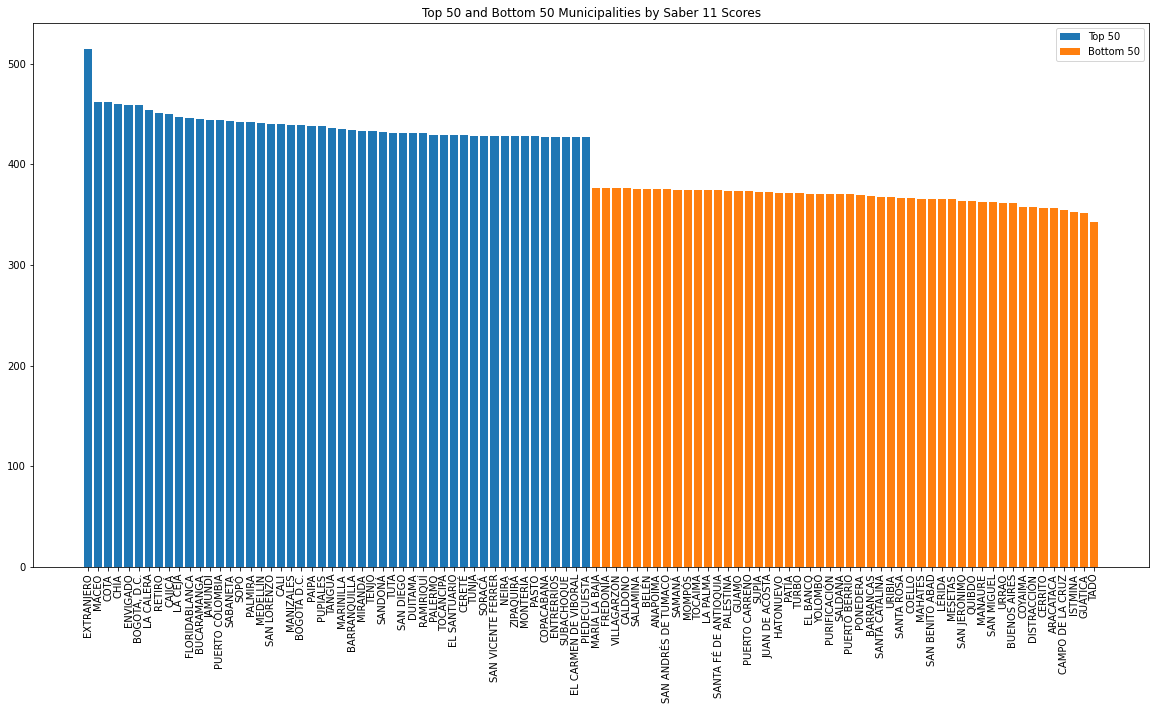

In [121]:
plt.figure(figsize=(20,10))
plt.bar(top_50_saber.index, top_50_saber, label = 'Top 50')
plt.bar(bot_50_saber.index, bot_50_saber, label = 'Bottom 50')
plt.xticks(rotation=90)
plt.legend()
plt.title('Top 50 and Bottom 50 Municipalities by Saber 11 Scores')

In [125]:
top_50_saber_pro = saber_municipality_score['total_saber_pro_score']['mean'].sort_values(ascending=False).head(50)
bot_50_saber_pro = saber_municipality_score['total_saber_pro_score']['mean'].sort_values(ascending=False).tail(50)

Text(0.5, 1.0, 'Top 50 and Bottom 50 Municipalities by Saber Pro Scores')

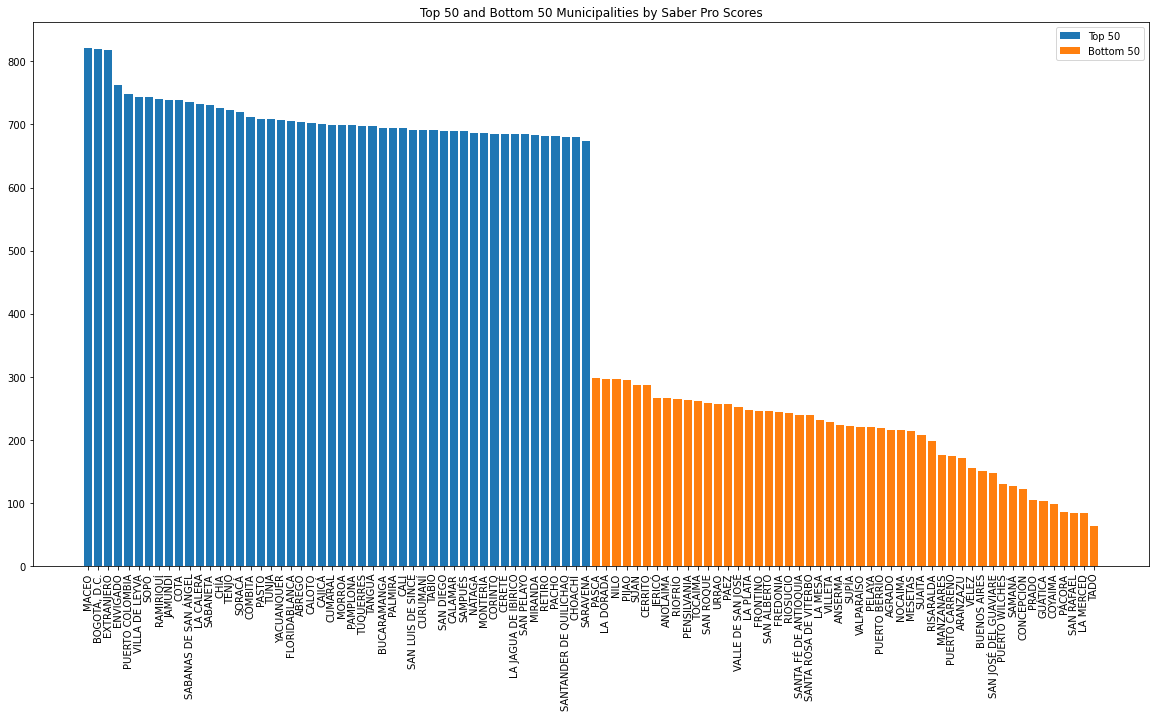

In [126]:
plt.figure(figsize=(20,10))
plt.bar(top_50_saber_pro.index, top_50_saber_pro, label = 'Top 50')
plt.bar(bot_50_saber_pro.index, bot_50_saber_pro, label = 'Bottom 50')
plt.xticks(rotation=90)
plt.legend()
plt.title('Top 50 and Bottom 50 Municipalities by Saber Pro Scores')

From the two graphs, we see that there is a great mean score difference between the Top 50 and Bottom 50 Municipalities. There is an even greater difference in Saber Pro. We will explore these differences by first examining the factors that affect mean saber scores. 

In [136]:
saber_top_50_municipalities = top_50_saber.index.to_list()
saber_bot_50_municipalities = bot_50_saber.index.to_list()
saber_pro_top_50_municipalities = top_50_saber_pro.index.to_list()
saber_pro_bot_50_municipalities = bot_50_saber_pro.index.to_list()

In [145]:
saber_top_50_municipalities_as_set = set(saber_top_50_municipalities)
saber_top_50_intersection = saber_top_50_municipalities_as_set.intersection(saber_pro_top_50_municipalities)
saber_top_50_intersection_list = list(saber_top_50_intersection)

print("\n There are {} municipalities in the saber and saber pro Top 50.".format(len(saber_top_50_intersection_list)))
print("\n These municipalities are {}".format(saber_top_50_intersection_list))

saber_bot_50_municipalities_as_set = set(saber_bot_50_municipalities)
saber_bot_50_intersection = saber_bot_50_municipalities_as_set.intersection(saber_pro_bot_50_municipalities)
saber_bot_50_intersection_list = list(saber_bot_50_intersection)

print("\n There are {} municipalities in the saber and saber pro Bot 50. \n".format(len(saber_bot_50_intersection_list)))
print("\n These municipalities are {}".format(saber_bot_50_intersection_list))


 There are 27 municipalities in the saber and saber pro Top 50.

 These municipalities are ['CAJICÁ', 'ENVIGADO', 'JAMUNDÍ', 'PALMIRA', 'RAMIRIQUÍ', 'MONTERÍA', 'TENJO', 'SORACÁ', 'SAN DIEGO', 'BOGOTÁ, D.C.', 'TUNJA', 'PUERTO COLOMBIA', 'COTA', 'SOPÓ', 'SABANETA', 'MACEO', 'BUCARAMANGA', 'MIRANDA', 'RETIRO', 'CALI', 'CHÍA', 'CERETÉ', 'PASTO', 'LA CALERA', 'EXTRANJERO', 'TANGUA', 'FLORIDABLANCA']

 There are 14 municipalities in the saber and saber pro Bot 50. 


 These municipalities are ['BUENOS AIRES', 'TADÓ', 'URRAO', 'MESETAS', 'SUPÍA', 'SAMANÁ', 'TOCAIMA', 'CERRITO', 'SANTA FÉ DE ANTIOQUIA', 'COYAIMA', 'FREDONIA', 'GUÁTICA', 'PUERTO CARREÑO', 'PUERTO BERRÍO']


We will be taking note of these municipalities as we explore the factors that affect mean saber and saber pro scores. 

## Scores by Social Factors

In [173]:
total_marks = ['total_saber_score', 'total_saber_pro_score']

social_factors = ['Gender', 'Did student took preparation test?', 'Took an special preparation test?', "Took another test that's not lectured by government?", 'Did he take an external test?', 
                  'Did you did a simulacrum?', 'Generic preparation for test', 'House stratum', 'Colombian Sisben level', 'Mensual family income', 'Family has internet?','Do you have computer?', 'Do you have kiln?', 'Do you have car?', 'Do you have fridge?', 'Do you have cellphone?', 
                  'How much books do you have', 'Does family have a phone?', "Father's education", "Mother's", "Father's Occupation", "Mother's Jo bOccupation"]

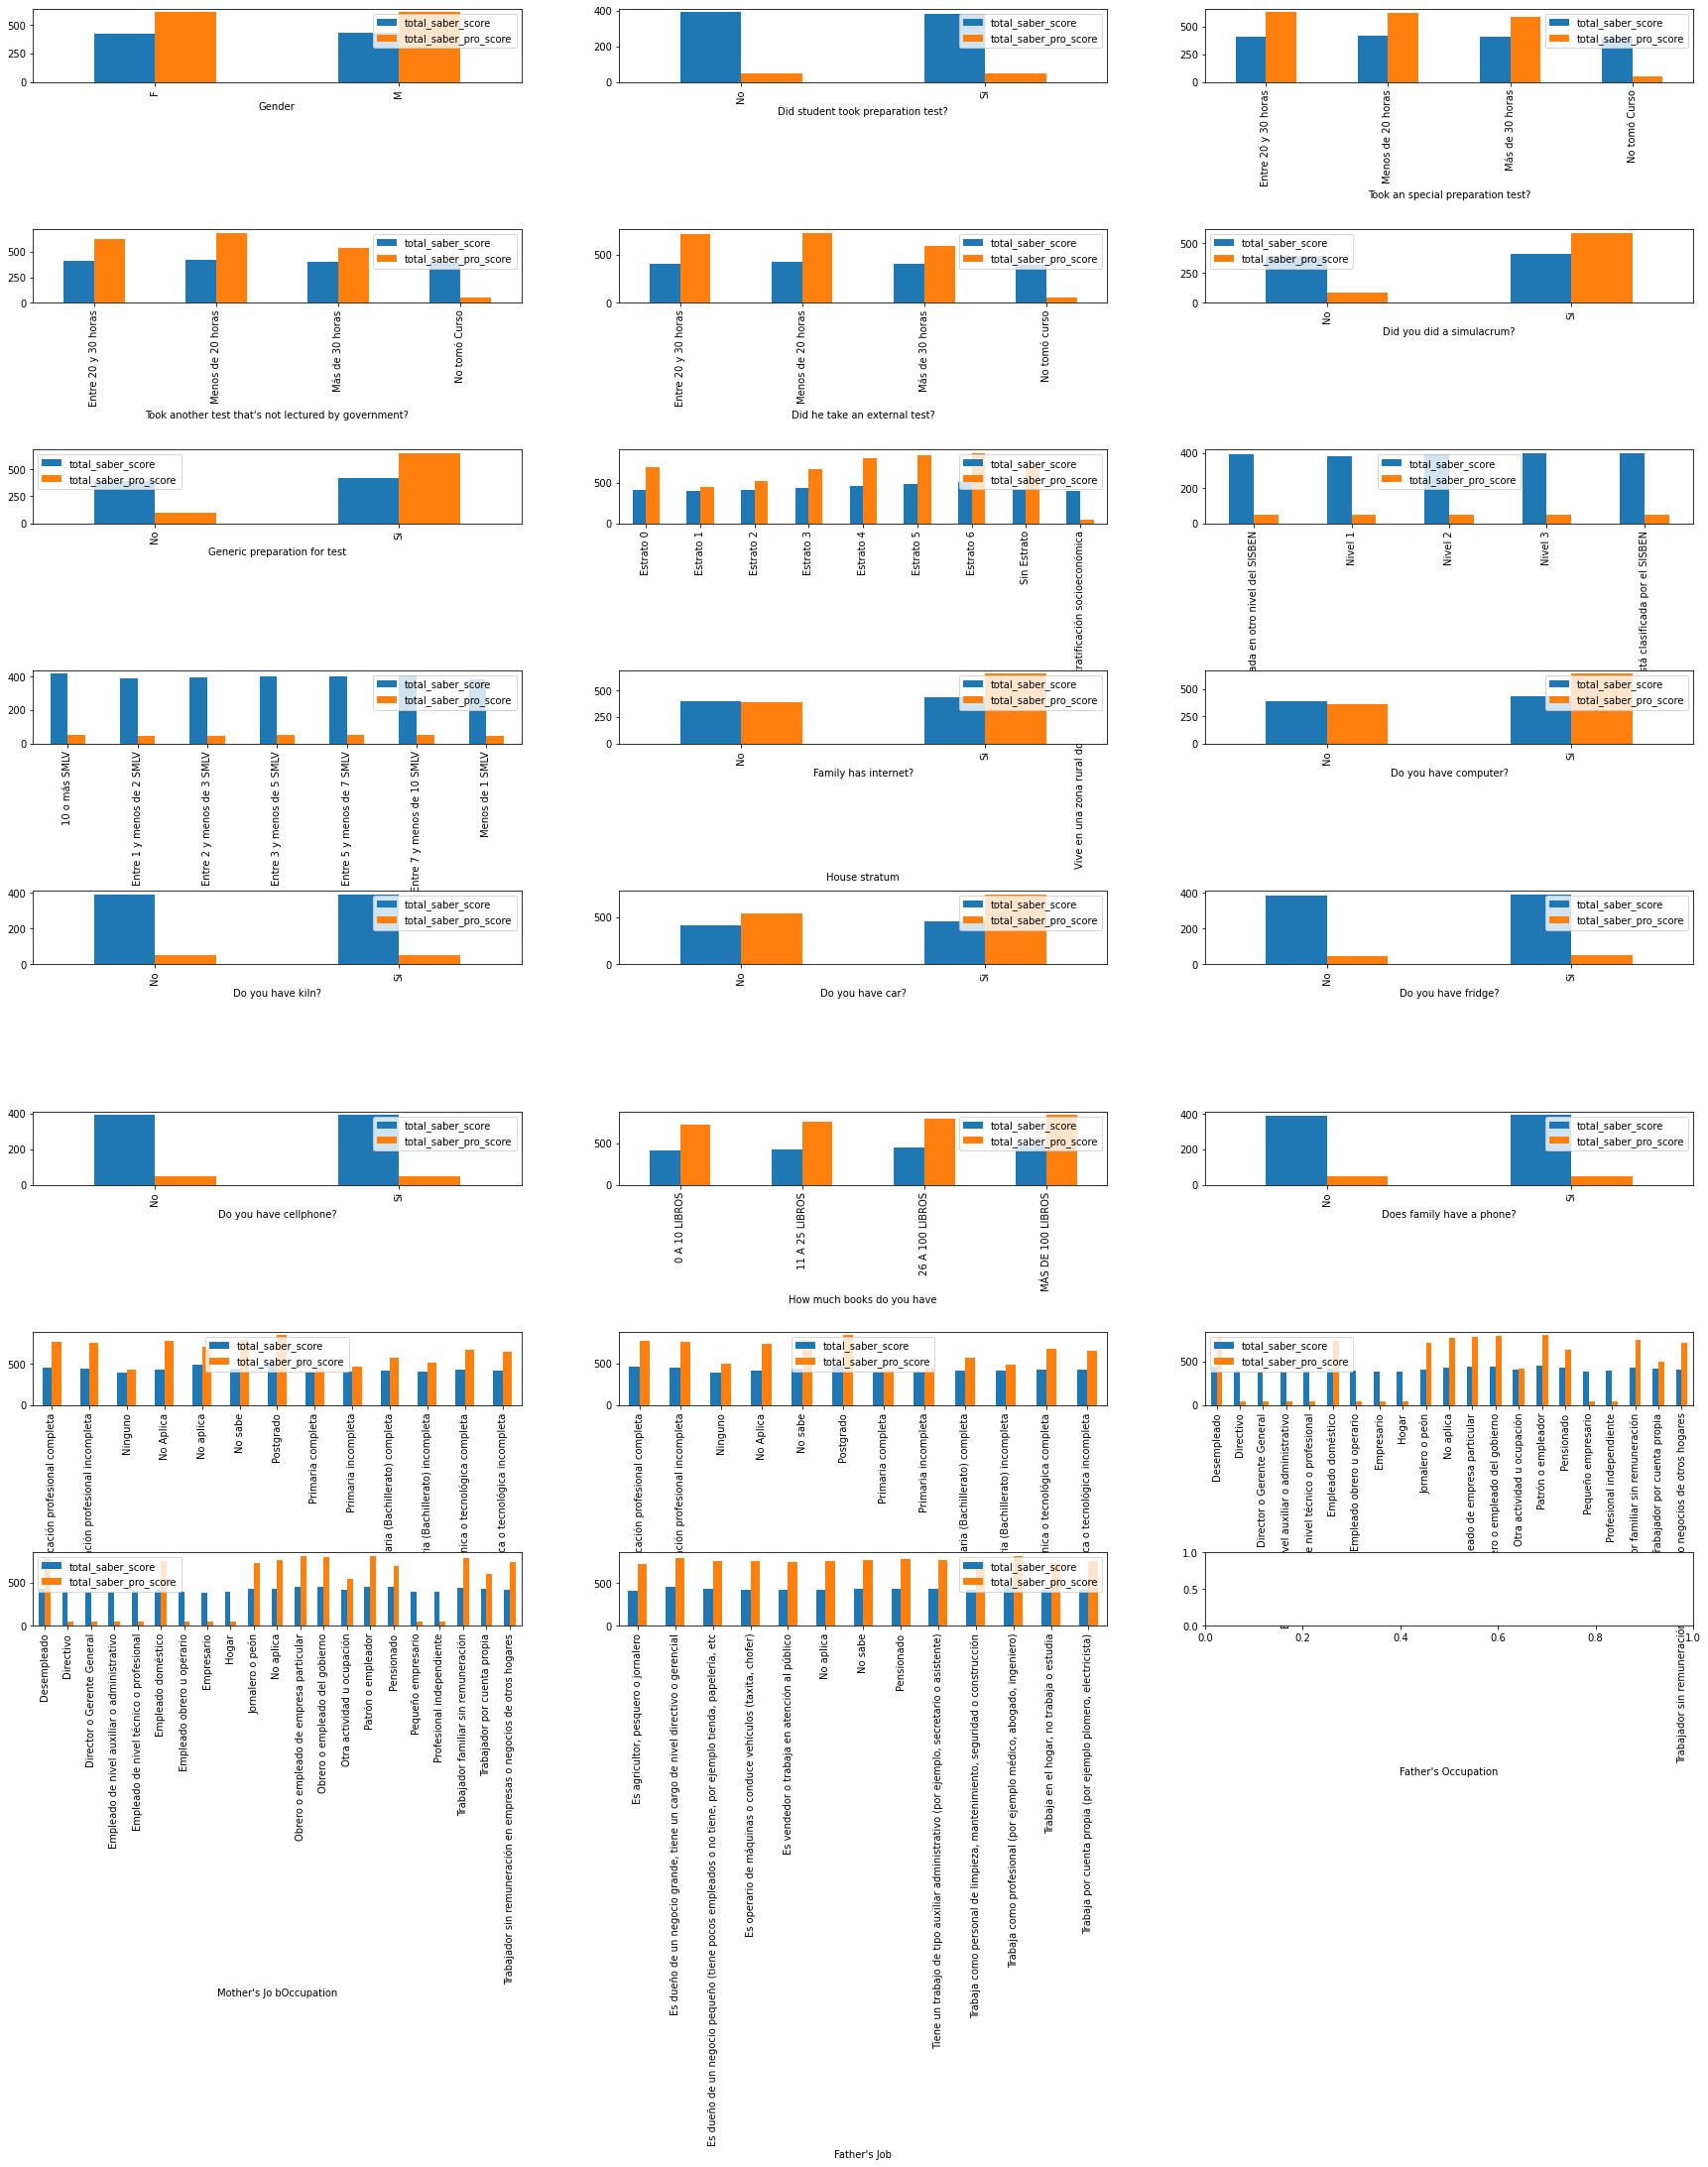

In [163]:
cols = 3
rows = len(social_factors) // cols+1
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(30,30))
plt.subplots_adjust(hspace = 2.0)

axe=axs.ravel()

counter = 0

for i in social_factors:
    saber.groupby(saber[i]).mean()[total_marks].plot.bar(ax=axe[counter])
    counter += 1

Based on the results of the graphs above, the following insights are gained:

*Note that the insights are for the MEAN TOTAL SCORES. Insights may differ per subject area or the like. Nonetheless, for overall mean scores for Saber 11 and Saber Pro, these insights are generated.*
  
**For Saber 11 ICFES**
- There is no correlation amongst all the social factors and Saber 11 scores. The scores remain consistent throughout 'Yes' or 'No' answers and other categorical options like 'Occupation' and 'Education of parents. There are no stark outliers observered. 
- Since there are no stark outliers observed from the 'mean', other levels of aggregations are recommended. 

**For Saber 11 Pro**
- The following features have a considerable effect to Saber 11 Pro scores. 
    - Took a  special preparation test?
    - Took another test that's not lectured by the government?
    - Did you did a simulacrum
    - Generic Preparation for Test
    - House Stratum
    - Family has internet?
    - Do you have a computer?
    - Do you have a car?
    - Father's education
    - Mother's education
    - Father's Occupation
    - Mother's Job occupation
  
**For Saber 11 and Saber 11 Pro**
- 'Did student took preparation test' appears to not matter. Whether the student took or not does not change his/her scores.
- 'Sisben level' appears to not matter. The sisben level does not affect overall scores. 
- 'Mensual income' appears to not matter. The monthly income level does not affect overall scores.
- kiln, fridge, cellphone, books, and cellphone appear to not matter. Whether one has them or not does not affect overall scores. 

**Now we have found out Saber 11 Pro has the more variance visually, we tie this back to the municipality question: Are the high and low scores of these municipalities affected by these social factors?**

In [175]:
saber_pro_top_50 = saber.loc[saber['Municipality'].isin(saber_pro_top_50_municipalities)]
print("There are {} datapoints in the saber dataset for all top 50 municipalities".format(saber_pro_top_50.shape[0]))

saber_pro_bot_50 = saber.loc[saber['Municipality'].isin(saber_pro_bot_50_municipalities)]
print("There are {} datapoints in the saber dataset for all bot 50 municipalities".format(saber_pro_bot_50.shape[0]))

There are 54195 datapoints in the saber dataset for all top 50 municipalities
There are 2258 datapoints in the saber dataset for all bot 50 municipalities


In [176]:
relevant_social_factors = ['Took an special preparation test?', "Took another test that's not lectured by government?", 'Did you did a simulacrum?', 
                           'Generic preparation for test', 'House stratum', 'Family has internet?','Do you have computer?', 'Do you have car?', "Father's education", 
                           "Mother's", "Father's Occupation", "Mother's Jo bOccupation"]

## Top 50 Municipalities Saber Pro

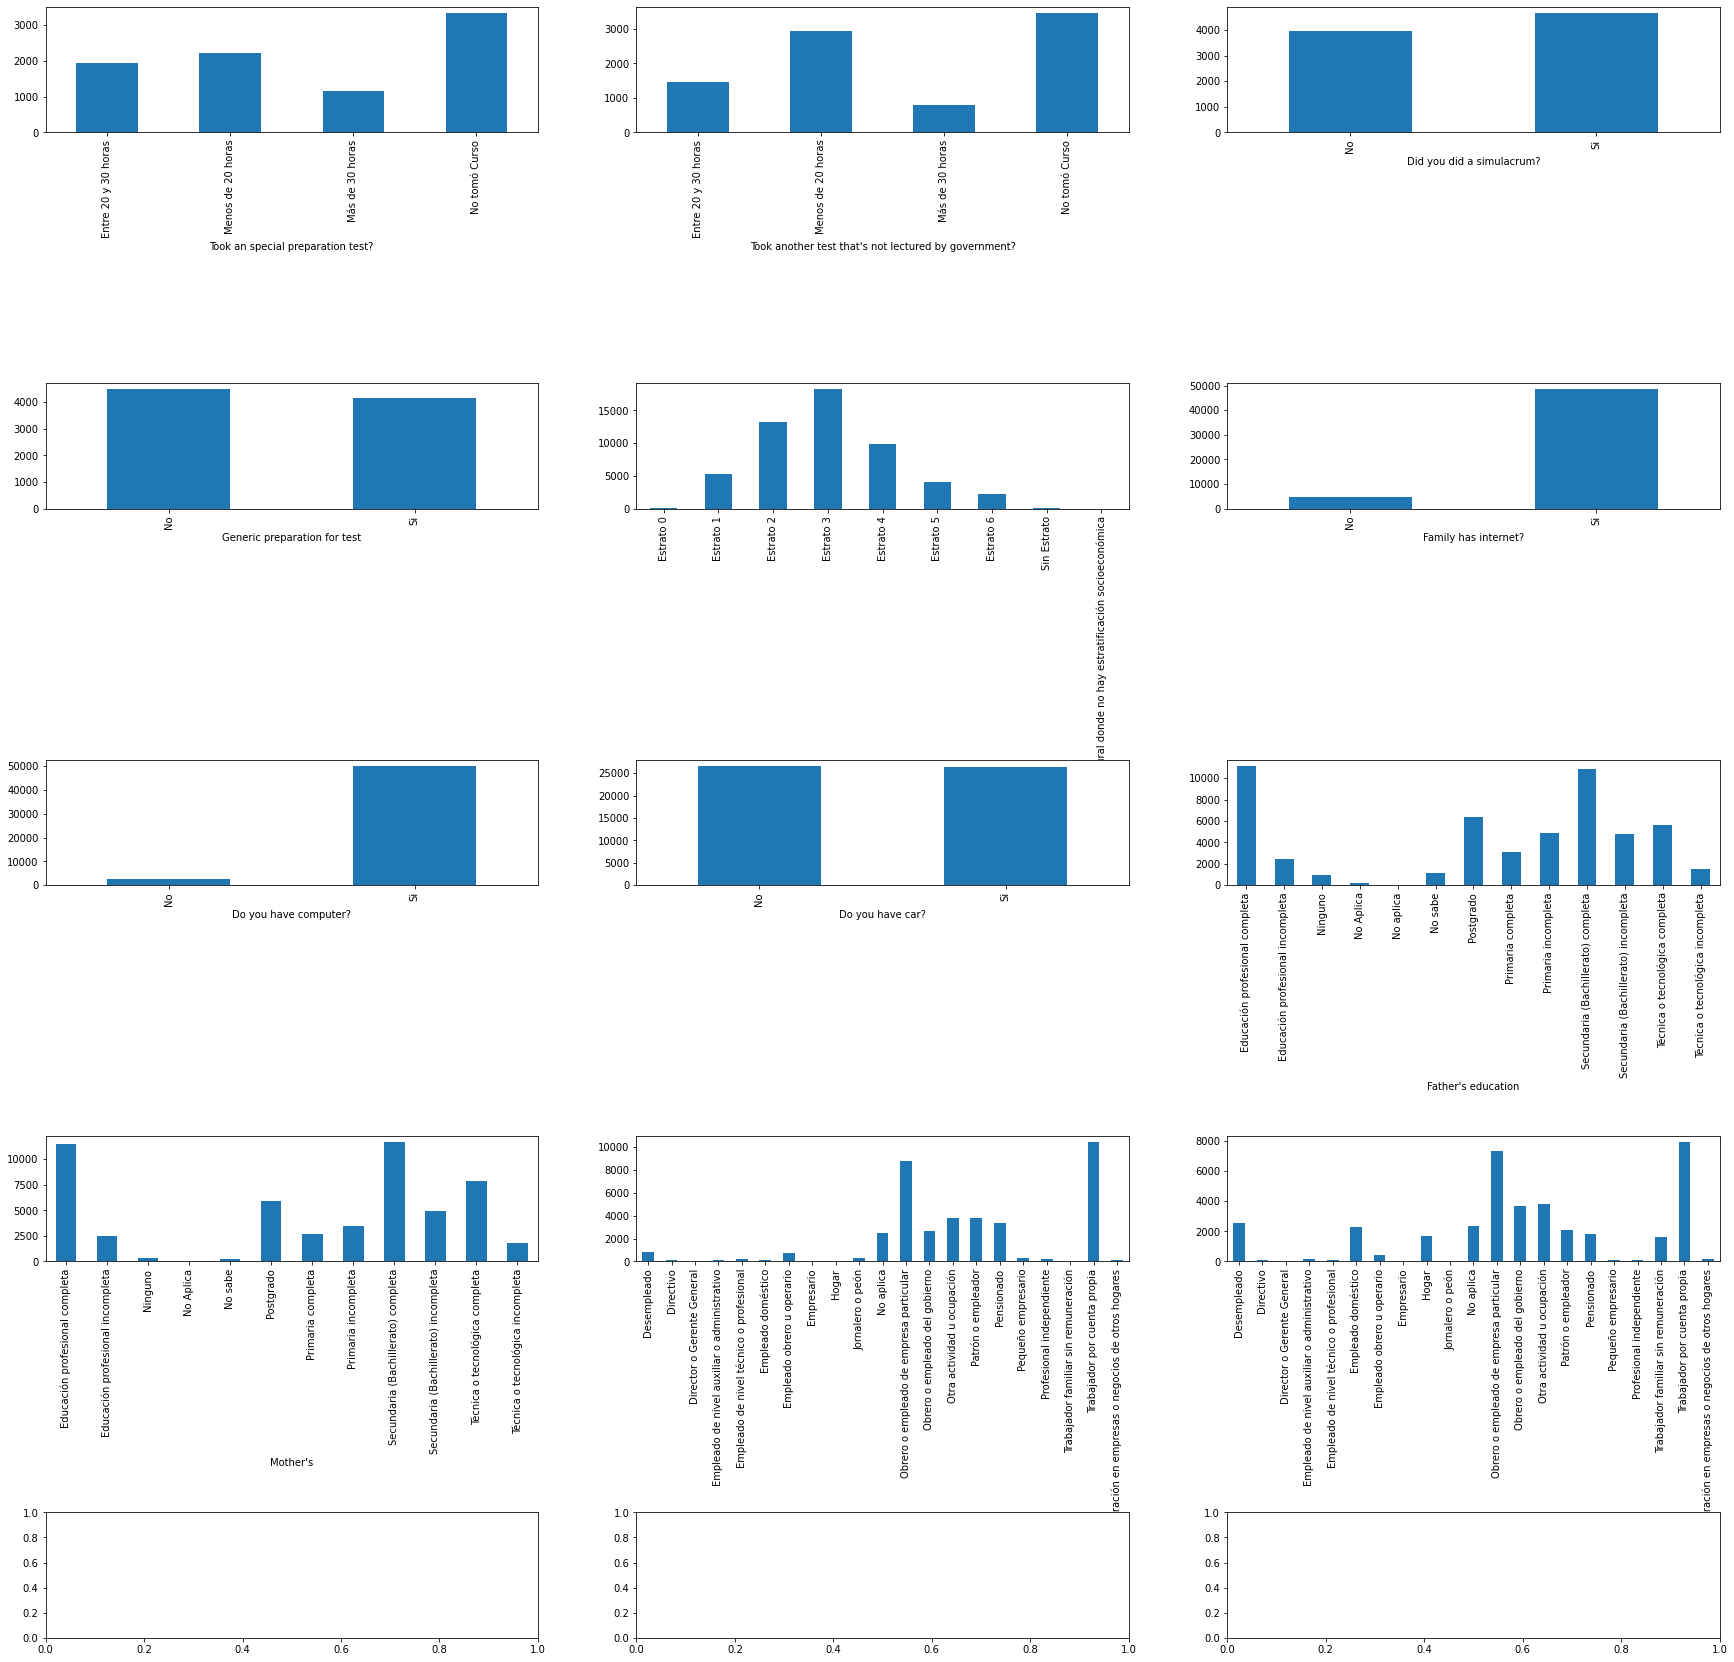

In [191]:
cols = 3
rows = len(relevant_social_factors) // cols+1
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(30,30))
plt.subplots_adjust(hspace = 2.0)

axe=axs.ravel()

counter = 0

for i in relevant_social_factors:
    saber_pro_top_50.groupby(saber_pro_top_50[i])['total_saber_pro_score'].count().plot.bar(ax=axe[counter])
    counter += 1

## Bottom 50 Municipalities Saber Pro

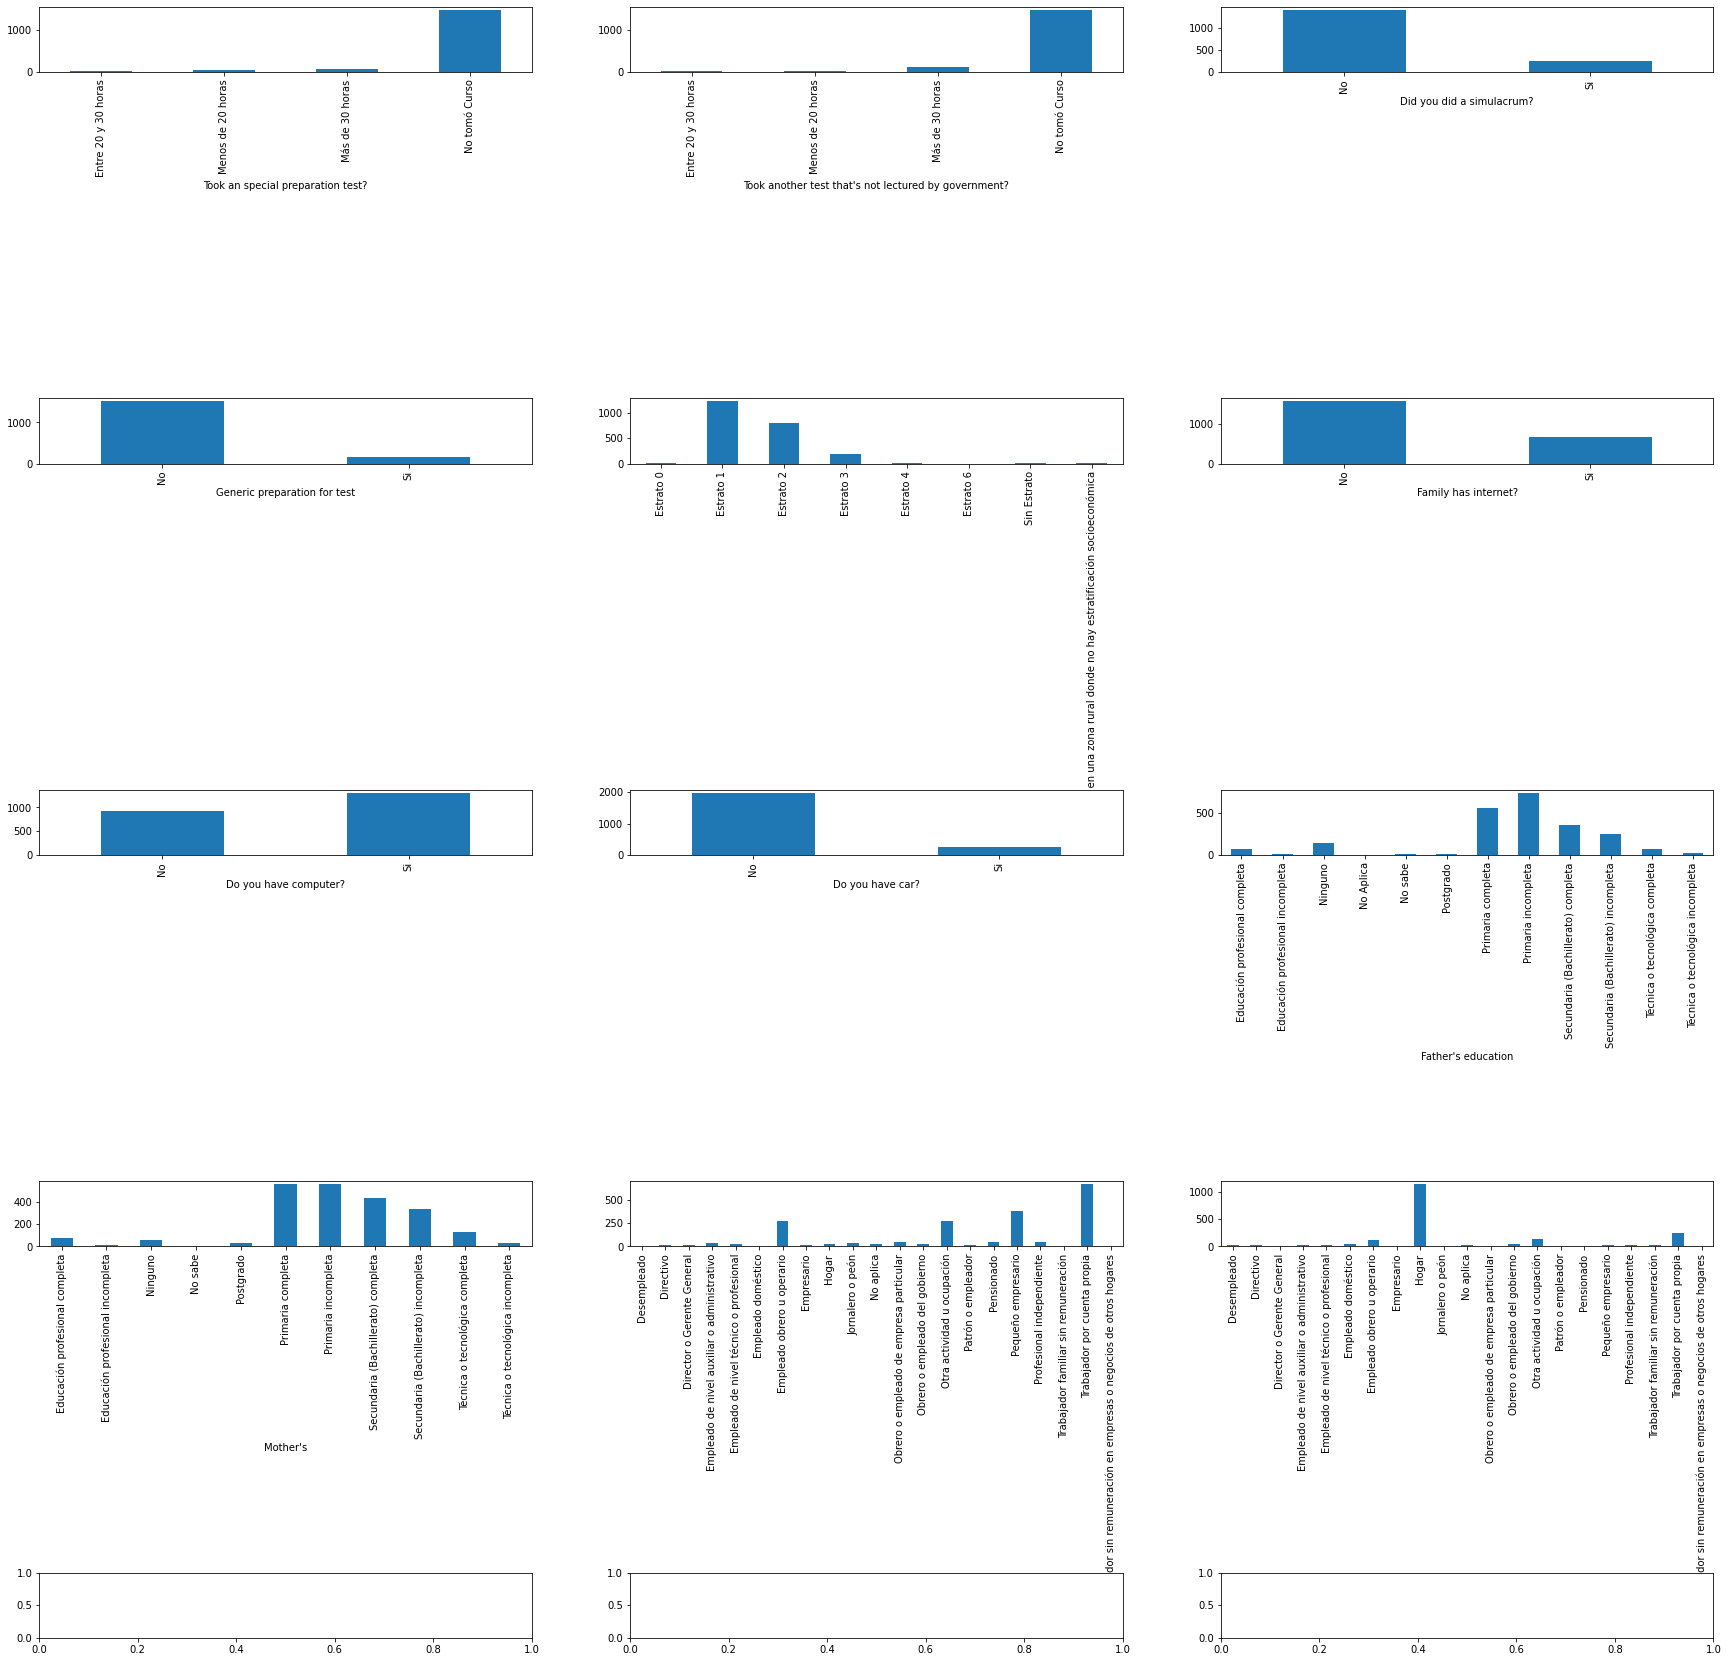

In [190]:
cols = 3
rows = len(relevant_social_factors) // cols+1
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(30,30))
plt.subplots_adjust(hspace = 5.0)

axe=axs.ravel()

counter = 0

for i in relevant_social_factors:
    saber_pro_bot_50.groupby(saber_pro_bot_50[i])['total_saber_pro_score'].count().plot.bar(ax=axe[counter])
    counter += 1

# Insights

### For the Top 50 Municipalities in terms of Saber Pro scores:
1. With regard to taking special preparation tests, simulacrums, and the generic preparation. It appears these factors do not affect as much the overall saber scores of the students as the highest number for each feature still correspond to not taking these tests. 
2. Majority of the students have computers and internet at home. These two features then are relevant to the dataset. 
3. Both the mother and father of students belonging to these municipalities have, in majority, finished at least secondary education. 
4. The father and mother of students belonging to these municipalities have, in majority, have employment belonging to Obrero o empleyado and trabajador por cuenta propia. 

### For the Bottom 50 Municipalities in terms of Saber Pro scores:
1. Majority of the students belonging to these municipalities were not able to take any preparation tests and it led to lower Saber Pro scores. 
2. Majority of the students have computers but no access to the internet. This may cause a decrease in Saber pro scores. 
3. Majority of the students' families belong to Estrata 1 house level, the lowest house levels in Colombia. 
4. A lot of parents in these municipalities have not finished primary school, and at maximum, only completed Secondary School. This shows a stark divide between the top 50 and the bottom 50. 
5. The father's of students belong to the class of pequeno empresário and trabajador por cuenta propia. However, majority of the mother's have jobs at Hogar (Home) which indicates the father is the one earning unlike in Top 50 municipalities where both parents are earning. 

#### Overall, based on the current analysis, we see that the factors of taking preparation tests, father's education, mother's education, father's occupation, mother's occupation, house stratum, and access to the internet have a greater impact of decreasing scores. Without these factors, Saber Pro scores of students decrease. There is, then, a stark divide shown between the Top and Bottom Municipalities when it comes to Saber Pro scores. 

### Next Steps:

1. Formulate more questions to visualize the colombian student population.
2. Determine whether there are more social factors that affect students test scores. 
3. Relate these social factors to whether the Saber scores become accurate to the current academic program of the student. Ask the question: Are these social factors hindering the student in pursuing the program to which he is most logically belonging to?